In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Loading dataset
file_path = "C:/Users/hp/OneDrive/Desktop/VCU/Sparks Foundation/SampleSuperstore.csv" 
data = pd.read_csv(file_path)
print("Data loaded successfully!")
print(data.head())


Data loaded successfully!
        Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5

In [4]:
#Checking basic information
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB
None


In [5]:
#Summary statistics
print(data.describe())

        Postal Code         Sales     Quantity     Discount       Profit
count   9994.000000   9994.000000  9994.000000  9994.000000  9994.000000
mean   55190.379428    229.858001     3.789574     0.156203    28.656896
std    32063.693350    623.245101     2.225110     0.206452   234.260108
min     1040.000000      0.444000     1.000000     0.000000 -6599.978000
25%    23223.000000     17.280000     2.000000     0.000000     1.728750
50%    56430.500000     54.490000     3.000000     0.200000     8.666500
75%    90008.000000    209.940000     5.000000     0.200000    29.364000
max    99301.000000  22638.480000    14.000000     0.800000  8399.976000


In [8]:
#Checking for missing values
print(data.isnull().sum())

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


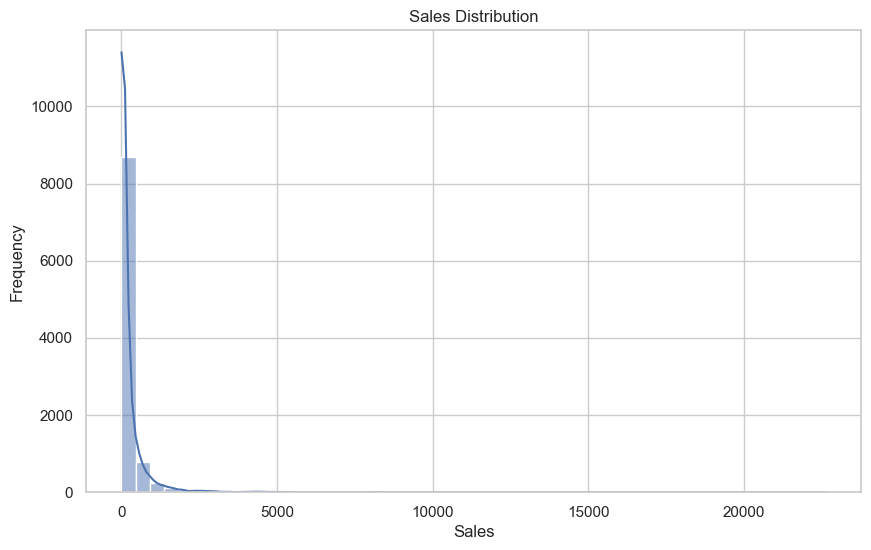

In [19]:
# Sales Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Sales'], bins=50, kde=True)
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()


In [20]:
#As the distribution is skewed to the right, most sales have a low sales value.
#There are very few higher value transactions represented by the tail-end part of the graph.

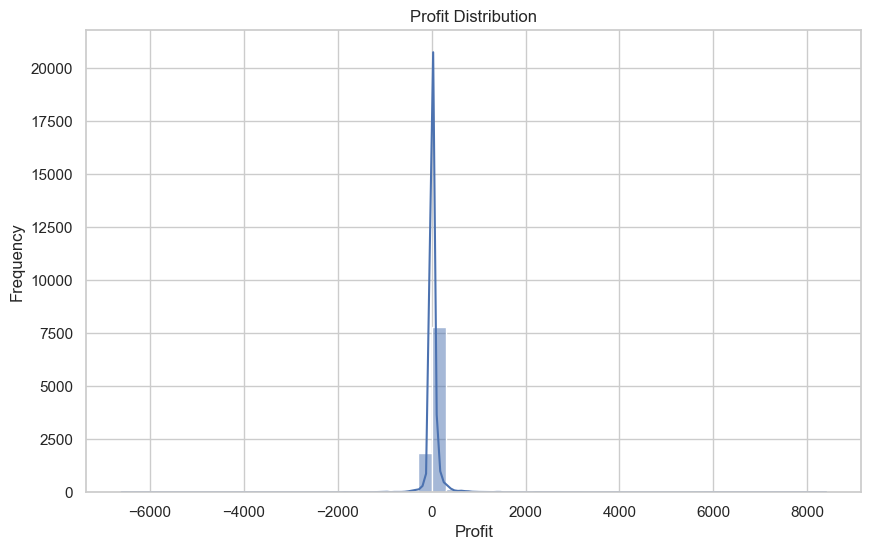

In [21]:
# Profit Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Profit'], bins=50, kde=True)
plt.title('Profit Distribution')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.show()

In [22]:
#Most transactions have low profit values as the diagram is centered around 0.
#We can also see negative profits (loss).

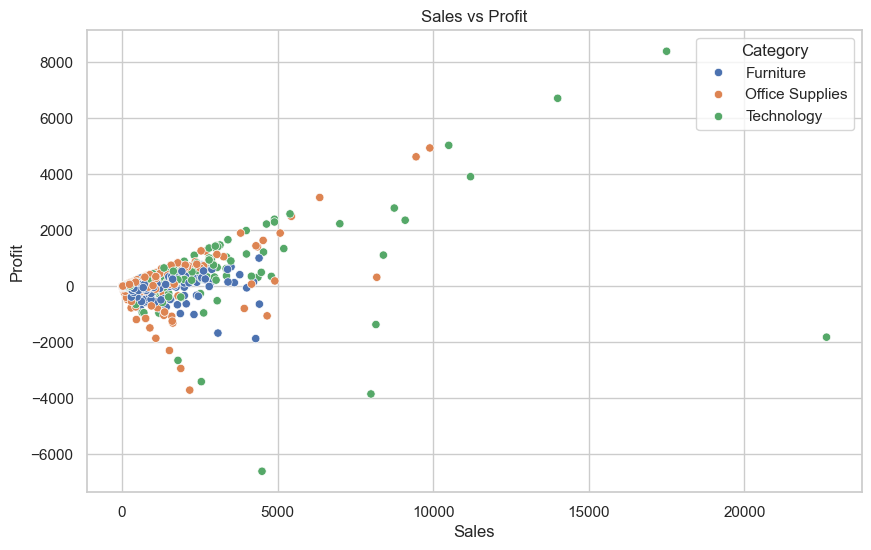

In [16]:
# Sales vs Profit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sales', y='Profit', data=data, hue='Category')
plt.title('Sales vs Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()

In [23]:
#Furniture is low on sales as well as profit

C:\Users\hp\AppData\Local\Temp\ipykernel_19180\2052873989.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Sales', data=category_sales_profit, palette='viridis')


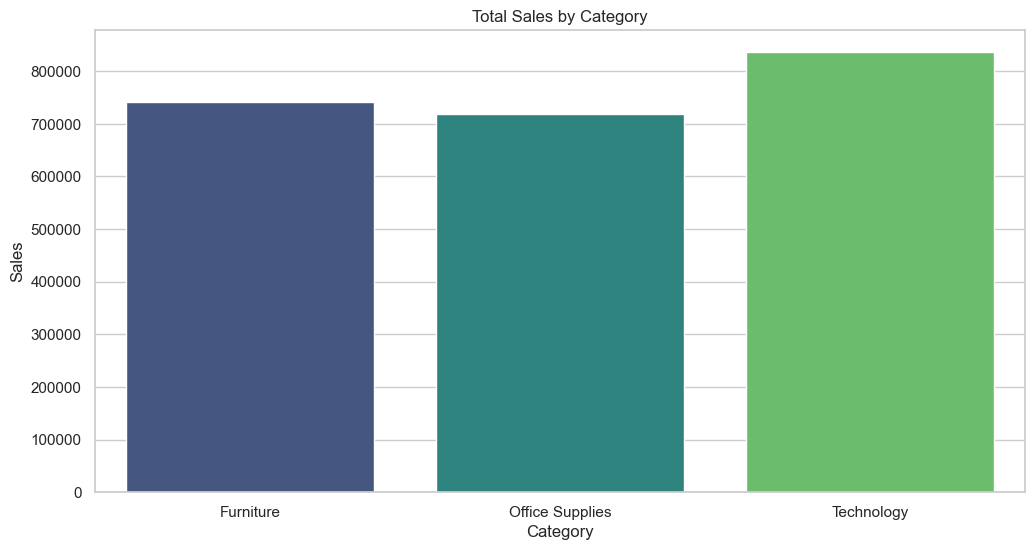

C:\Users\hp\AppData\Local\Temp\ipykernel_19180\2052873989.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Profit', data=category_sales_profit, palette='viridis')


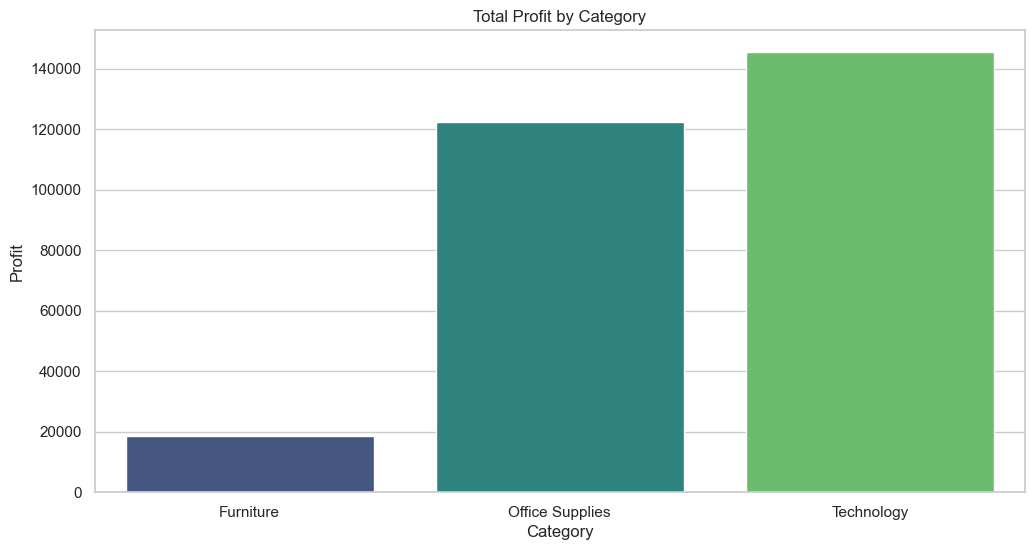

In [24]:
# Sales and Profit by Category
plt.figure(figsize=(12, 6))
category_sales_profit = data.groupby('Category')[['Sales', 'Profit']].sum().reset_index()
sns.barplot(x='Category', y='Sales', data=category_sales_profit, palette='viridis')
plt.title('Total Sales by Category')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Profit', data=category_sales_profit, palette='viridis')
plt.title('Total Profit by Category')
plt.show()

In [25]:
#Technology stands first, followed by office supplies and furniture in terms of sales and profits.

C:\Users\hp\AppData\Local\Temp\ipykernel_19180\1873625036.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Sales', data=region_sales_profit, palette='viridis')


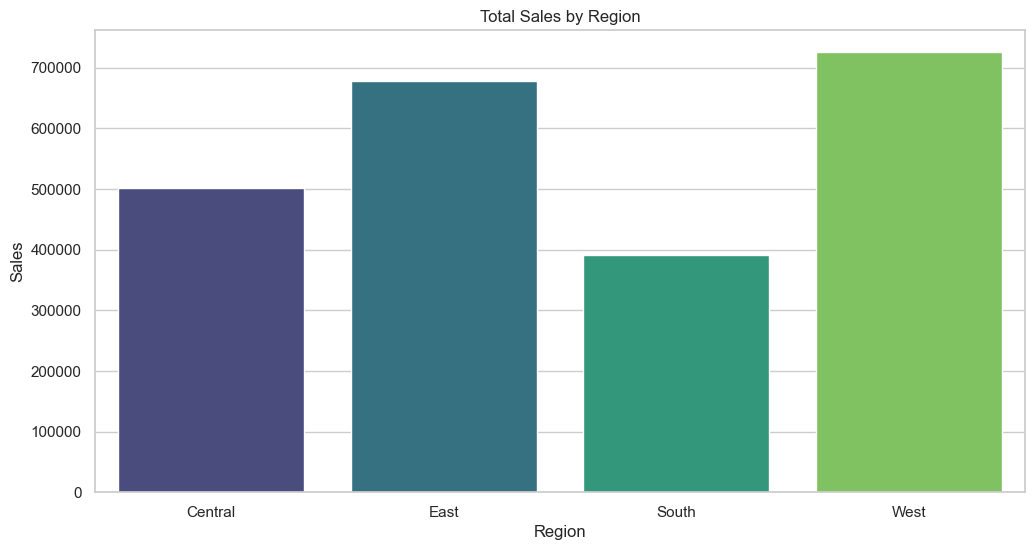

C:\Users\hp\AppData\Local\Temp\ipykernel_19180\1873625036.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Profit', data=region_sales_profit, palette='viridis')


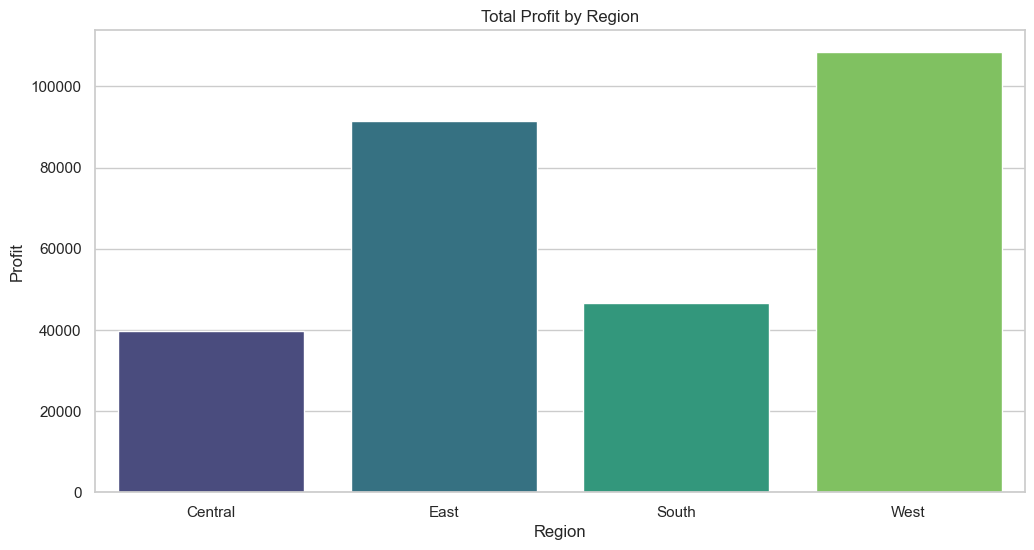

In [26]:
# Sales and Profit by Region
plt.figure(figsize=(12, 6))
region_sales_profit = data.groupby('Region')[['Sales', 'Profit']].sum().reset_index()
sns.barplot(x='Region', y='Sales', data=region_sales_profit, palette='viridis')
plt.title('Total Sales by Region')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Profit', data=region_sales_profit, palette='viridis')
plt.title('Total Profit by Region')
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_19180\4207966081.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Profit', y='Sub-Category', data=subcategory_sales_profit, palette='viridis')


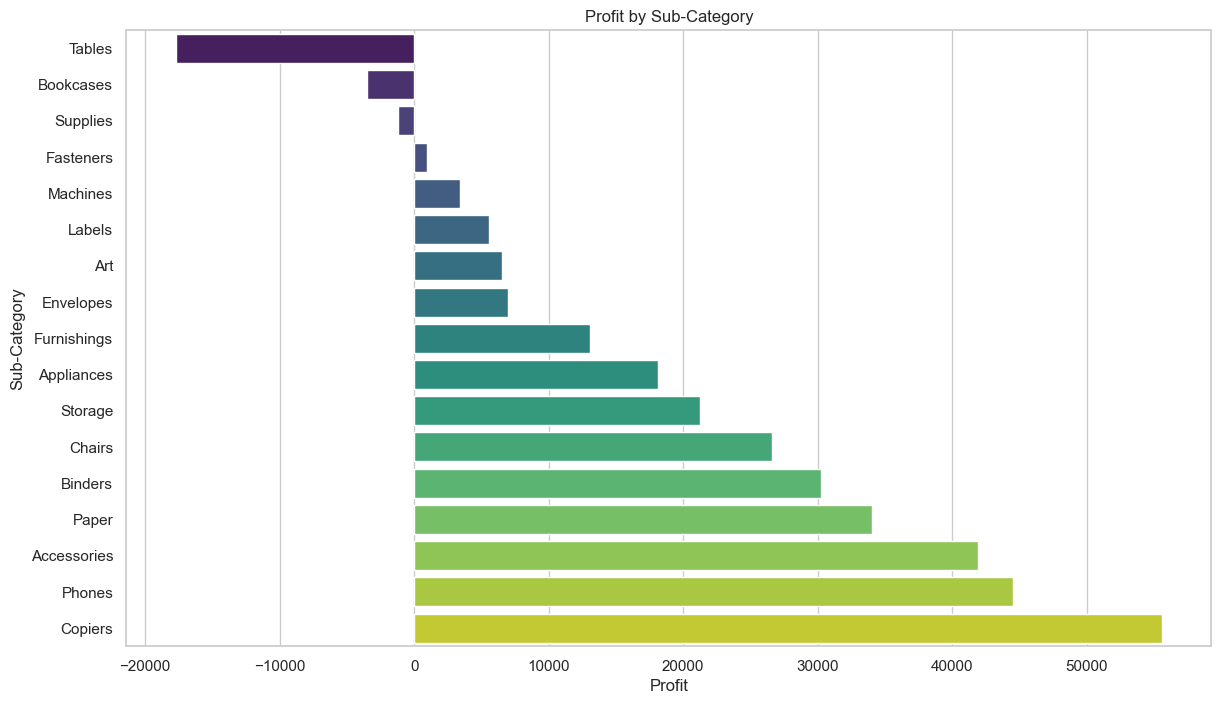

In [27]:
# Sub-category Analysis
plt.figure(figsize=(14, 8))
subcategory_sales_profit = data.groupby('Sub-Category')[['Sales', 'Profit']].sum().reset_index()
subcategory_sales_profit = subcategory_sales_profit.sort_values(by='Profit')
sns.barplot(x='Profit', y='Sub-Category', data=subcategory_sales_profit, palette='viridis')
plt.title('Profit by Sub-Category')
plt.show()


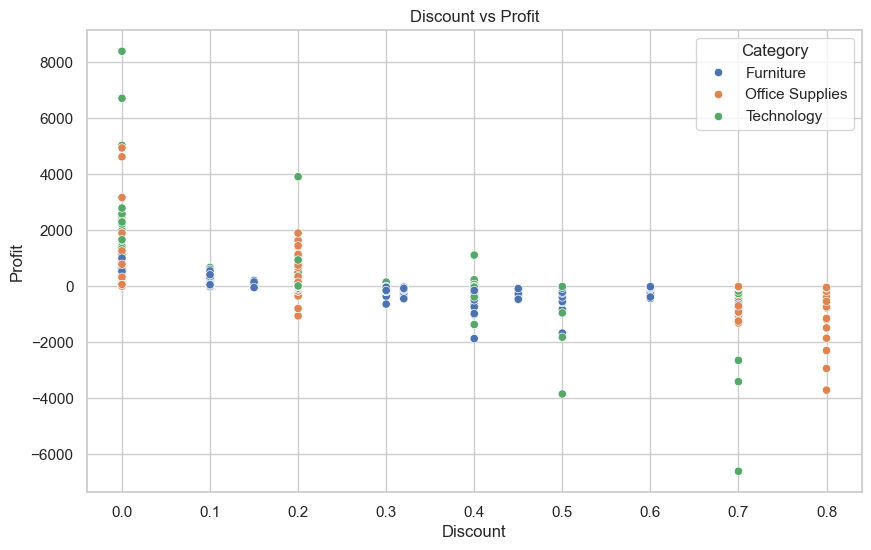

In [28]:
# Discount Impact on Profit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Discount', y='Profit', data=data, hue='Category')
plt.title('Discount vs Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()

In [29]:
#The discount factors are not very efficient as we can see here. 

In [31]:
#Business problems identified
#1. Furniture goods affected by losses.
#2. Higher discounts given only for office supplies.
#3. Discounts not acting efficient, especially for furnitures and office supplies.
